In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nilearn
import nilearn.masking

### process with pred_maps and target dataset

In [2]:
pwd

'/global/cfs/cdirs/m4244/connTask'

In [4]:
from src.conntask_ni import utils, extract_features, model_and_predict
import pickle

In [5]:
task_output_file = 'output/UKB/task/task_emotion_cope1_nsamples_1000.pickle'
pred_maps_dir = 'output/UKB/result/output_UKB_cope1_d21_nsamples_1000_glm_pred_maps.pickle'
gm_mask_dir = 'output/UKB/mask/MNI_152_GM_mask.nii.gz'
whole_mask_dir = 'output/UKB/mask/MNI_152_mask.nii.gz'
parcel_dir = 'output/UKB/ROI/masked_ROI_Sch_100P_7N.npy'
parcellation = utils.read_data(parcel_dir).squeeze()


with open(task_output_file, 'rb') as pickle_in:
    target = pickle.load(pickle_in)

with open(pred_maps_dir, 'rb') as pickle_in:
    pred_maps = pickle.load(pickle_in)

# apply gray matter mask
gm_mask = nilearn.masking.apply_mask(gm_mask_dir, mask_img=whole_mask_dir)
assert gm_mask.shape[0] == pred_maps.shape[0] # should be 237969

In [6]:
# for parcel in range(1,100):
#     print('parcel:',parcel)
#     diag, off_diag, CM = utils.eval_pred_success(pred_maps, target.T,parcellation==parcel) # gm_mask==1
#     print('diagonal:',diag.mean())
#     print('diagonal index:',diag.mean() - off_diag[off_diag!=0].mean())

gm_mask

In [7]:
diag, off_diag, CM = utils.eval_pred_success(pred_maps, target.T,mask=gm_mask==1) # mask==1
print(diag.mean(), np.median(diag), diag.std())
print(diag.mean() - off_diag[off_diag!=0].mean())

0.4844028891980397 0.5101741250578311 0.12421245943579488
0.05462240328348883


no mask

In [8]:
diag, off_diag, CM = utils.eval_pred_success(pred_maps, target.T) # mask==1
print(diag.mean(), np.median(diag), diag.std())
print(diag.mean() - off_diag[off_diag!=0].mean())

not masking
0.457364299712031 0.48031906061407914 0.11987103947177825
0.051513280286355934


In [9]:
diag, off_diag, CM = utils.eval_pred_success(pred_maps, target.T,mask=parcellation>0) # mask==1
print(diag.mean(), np.median(diag), diag.std())
print(diag.mean() - off_diag[off_diag!=0].mean())

0.5559939758536607 0.5873086062200306 0.13654578957773686
0.0626690431189359


#### applying gray matter mask (0.484,0.457) is better than no mask (0.457, 0.051), but is worse than parcellation(sch,100P,7N) > 0 (0.555,0.062). 
#### No single parcellation override the performance from parcellation>0

In [10]:
diag, off_diag, CM = utils.eval_pred_success(pred_maps, target.T,mask=parcellation>0,normalize=True) # mask==1

ValueError: operands could not be broadcast together with shapes (131406,1000) (131406,) 

In [11]:
diag = CM.diagonal()
off_diag_up_low = (np.triu(CM,k=1) + np.tril(CM,k=-1))
off_diag = off_diag_up_low[off_diag_up_low!=0] #CM[np.triu(np.ones(CM.shape)) == 0]
print(diag[np.diag(CM) > 0].mean(), np.median(diag[np.diag(CM) > 0]), diag[np.diag(CM) > 0].std())

off_diag[off_diag!=0]
print(diag.mean() - off_diag[off_diag!=0].mean())

0.5625966214194792 0.5883193069351847 0.11751969731301065
0.0626690431189359


In [12]:
(np.diag(CM) > 0).shape

(1000,)

In [13]:
CM.shape

(1000, 1000)

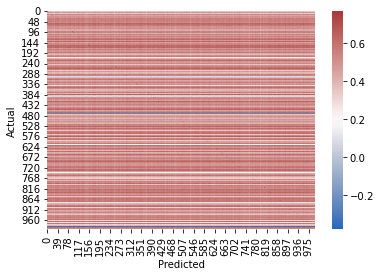

In [16]:
heatmap = sns.heatmap(CM[:1000,:1000],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

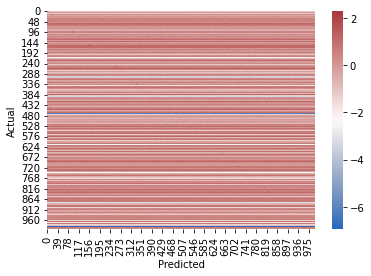

In [15]:
heatmap = sns.heatmap(((CM-CM.mean(axis=0))/CM.std(axis=0))[:1000,:1000],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
heatmap = sns.heatmap(CM[:1000,:1000],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

subjects whose diagonality is has minus correlation

In [126]:
np.where(np.diag(CM) < 0)

(array([ 87, 328, 470, 485, 586, 786, 973, 986, 989]),)

In [1]:
import os
rs_data_dir = '/global/cfs/cdirs/m4244/registration/20227_1_MNI'
task_data_dir = '/global/cfs/cdirs/m4244/registration/20249_unzip_1_beta_MNI'
cope = 1
all_betas = sorted(os.listdir(task_data_dir))
rsfMRI = [ subj[:17] for subj in os.listdir(rs_data_dir) ] 

subjlist_20249 = [subj for subj in all_betas if (os.path.exists(os.path.join(task_data_dir,subj,f'zstat{cope}_MNI_space.nii.gz')) and (subj.replace('20249','20227') in rsfMRI))] # filter out subjects that has both task fMRI and rs-fMRI

subjlist_20227 = [subj.replace('20249','20227') for subj in subjlist_20249]

subjlist_20249 = subjlist_20249[:1000]
subjlist_20227 = subjlist_20227[:1000]


In [2]:
subjlist_20249[87]

'1010418_20249_2_0'

In [3]:
subjlist_20249[328]

'1042574_20249_2_0'

In [4]:
subjlist_20227[:10]

['1000254_20227_2_0',
 '1000353_20227_2_0',
 '1000838_20227_2_0',
 '1000867_20227_2_0',
 '1000880_20227_2_0',
 '1000880_20227_3_0',
 '1000943_20227_2_0',
 '1001044_20227_2_0',
 '1001498_20227_2_0',
 '1001565_20227_2_0']

d21 sample 3000 (glm)

In [27]:
target_npy = 'output/UKB/result/output_UKB_cope1_d21_nsamples_3000_glm.npy' #'output_UKB_cope1_d21_nsamples_3000_SGDRegressor.npy'

CM=np.load(target_npy)

normalized correlation (bad)

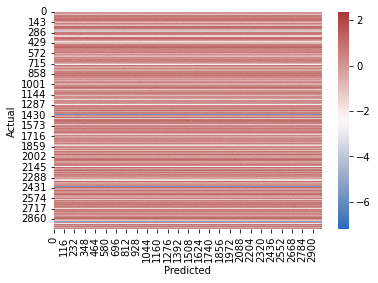

In [28]:
row_normalized = ((CM-CM.mean(axis=0)) / CM.std(axis=0))
column_normalized = ((row_normalized-row_normalized.mean(axis=1)) / row_normalized.std(axis=1))
heatmap = sns.heatmap((row_normalized),cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

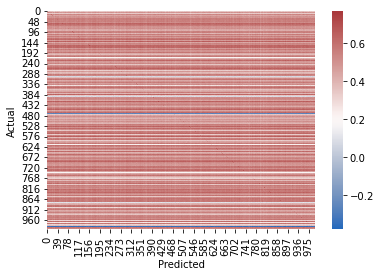

In [29]:
heatmap = sns.heatmap(CM[:1000,:1000],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

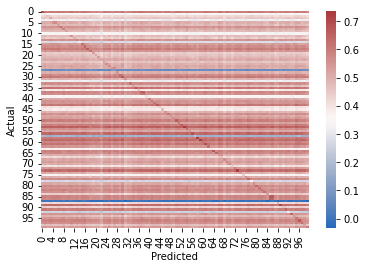

In [30]:
heatmap = sns.heatmap(CM[:100,:100],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
CM

array([[0.68414474, 0.61687508, 0.59644872, ..., 0.61486085, 0.60270382,
        0.59593906],
       [0.36864999, 0.39419865, 0.33899772, ..., 0.34271843, 0.36558793,
        0.34523516],
       [0.41652171, 0.41918822, 0.4612025 , ..., 0.42231816, 0.43439176,
        0.41981087],
       ...,
       [0.58328243, 0.59563473, 0.58586651, ..., 0.65051238, 0.5859328 ,
        0.58914943],
       [0.60280076, 0.62975121, 0.62610908, ..., 0.63048055, 0.67953978,
        0.62330189],
       [0.18111171, 0.16187593, 0.16465791, ..., 0.16785745, 0.16756804,
        0.17419651]])

In [25]:
# previous method
diag = CM.diagonal()
off_diag = CM[np.triu(np.ones(CM.shape)) == 0]
print(f'diagonal mean: {diag.mean()}')
print(f'diagonlity index: {diag.mean() - off_diag.mean()}') 

diagonal mean: 0.5633317248657691
diagonlity index: 0.06052387399775305


In [32]:
# recent method
diag = CM.diagonal()
off_diag_up_low = (np.triu(CM,k=1) + np.tril(CM,k=-1))
off_diag = off_diag_up_low[off_diag_up_low!=0] #CM[np.triu(np.ones(CM.shape)) == 0]
print(diag.mean(), np.median(diag), diag.std())
off_diag[off_diag!=0]
diag.mean() - off_diag[off_diag!=0].mean()

0.5633317248657691 0.5942963441793404 0.13504081742448454


0.06266933081369586

### K-S test (to check whether diag and off diag are significantly different.)

In [25]:
import scipy
scipy.stats.kstest(diag,off_diag).statistic,scipy.stats.kstest(diag,off_diag).pvalue# D = ~~ , p < ~~. The bigger D and the lower p, the better. 

(0.31710510510510503, 8.135646108854389e-90)

### Histogram

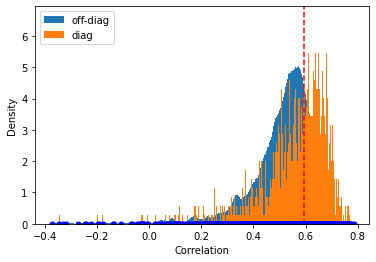

In [45]:
plt.hist(off_diag,bins=1000,density=True,label='off-diag') # off-diagonals
plt.hist(diag,bins=1000,density=True,label='diag')
plt.axvline(x=np.median(diag), ymin=0, ymax=7,color='r',linestyle='--') # red dotted line denotes the median of diagonal correlations
plt.plot(diag, np.zeros_like(diag), 'bo', markersize=5) # The markers on the x-axis are the diagonal correlations
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.legend()
plt.show()


In [18]:
CM.shape

(3000, 3000)

### The portion of participants that the diagonal prediction was the most accurate one for them

In [32]:
np.mean(np.argmax(CM,axis=1) == np.arange(CM.shape[0])) # the maximum pred index for each actual map.

0.861

([<matplotlib.patches.Wedge at 0x1477f8af4040>,
 [Text(-0.996776233334193, 0.46522805231423736, 'Diagonal'),
  Text(0.9967762333341931, -0.46522805231423703, 'Other')])

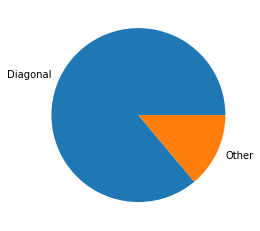

In [33]:
plt.pie((np.mean(np.argmax(CM,axis=1) == np.arange(CM.shape[0])),1-np.mean(np.argmax(CM,axis=1) == np.arange(CM.shape[0]))),labels=['Diagonal','Other'])

d55 sample 1000

In [4]:
target_npy = 'output/UKB/result/output_UKB_cope1_d55_nsamples_1000_glm.npy' #'output_UKB_cope1_d21_nsamples_3000_SGDRegressor.npy'

CM=np.load(target_npy)


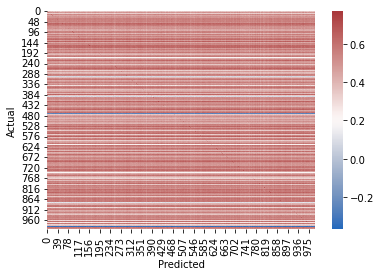

In [5]:
heatmap = sns.heatmap(CM[:1000,:1000],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

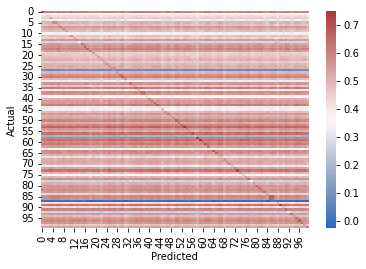

In [6]:
heatmap = sns.heatmap(CM[:100,:100],cmap='vlag')
fig = heatmap.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
diag = CM.diagonal()
off_diag = CM[np.triu(np.ones(CM.shape)) == 0]
print(f'diagonal mean: {diag.mean()}')
print(f'diagonlity index: {diag.mean() - off_diag.mean()}') # previous method

diagonal mean: 0.563347288323183
diagonlity index: 0.06923866879532242


In [9]:
diag[540]

0.7652323215319615

In [10]:
diag = CM.diagonal()
off_diag_up_low = (np.triu(CM,k=1) + np.tril(CM,k=-1))
off_diag = off_diag_up_low[off_diag_up_low!=0] #CM[np.triu(np.ones(CM.shape)) == 0]
print(f'diagonal mean:{diag.mean()}, diagonal median:{np.median(diag)}, diagonal std:{diag.std()}')
off_diag[off_diag!=0]
print('diagonality index:',diag.mean() - off_diag[off_diag!=0].mean())

diagonal mean:0.563347288323183, diagonal median:0.5963555944603414, diagonal std:0.13711339405730671
diagonality index: 0.06880472812256266


In [11]:
import scipy
scipy.stats.kstest(diag,off_diag).statistic,scipy.stats.kstest(diag,off_diag).pvalue# D = ~~ , p < ~~. The bigger D and the lower p, the better. 

(0.3462382382382383, 1.713451091760866e-107)

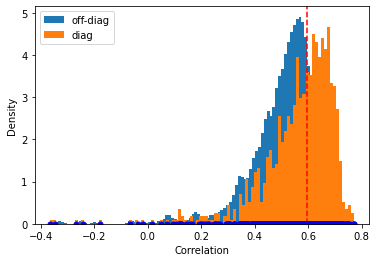

In [12]:
plt.hist(off_diag,bins=100,density=True,label='off-diag') # off-diagonals
plt.hist(diag,bins=100,density=True,label='diag')
plt.axvline(x=np.median(diag), ymin=0, ymax=7,color='r',linestyle='--') # red dotted line denotes the median of diagonal correlations
plt.plot(diag, np.zeros_like(diag), 'bo', markersize=5) # The markers on the x-axis are the diagonal correlations
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.legend()
plt.show()


In [13]:
# Accuracy
np.mean(np.argmax(CM,axis=1) == np.arange(CM.shape[0])) # the maximum pred index for each actual map.

0.888

#### the more ICA components, the better

Stat map visualization

In [33]:
task_output_file = 'output/UKB/task/task_emotion_cope1_nsamples_1000.pickle'
pred_maps_dir = 'output/UKB/result/output_UKB_cope1_d21_nsamples_1000_glm_pred_maps.pickle'
gm_mask_dir = 'output/UKB/mask/MNI_152_GM_mask.nii.gz'
whole_mask_dir = 'output/UKB/mask/MNI_152_mask.nii.gz'
parcel_dir = 'output/UKB/ROI/masked_ROI_Sch_100P_7N.npy'
parcellation = utils.read_data(parcel_dir).squeeze()


with open(task_output_file, 'rb') as pickle_in:
    target = pickle.load(pickle_in)

with open(pred_maps_dir, 'rb') as pickle_in:
    pred_maps = pickle.load(pickle_in)

# apply gray matter mask
gm_mask = nilearn.masking.apply_mask(gm_mask_dir, mask_img=whole_mask_dir)
assert gm_mask.shape[0] == pred_maps.shape[0] # should be 237969

In [35]:
import nibabel as nb
brain_mask = nb.load(whole_mask_dir)
brain_mask_np = brain_mask.get_fdata()
target_image = np.zeros_like(brain_mask_np)
pred_image = np.zeros_like(brain_mask_np)
#ith subjects
target_image[brain_mask_np !=0] = target[540] # the largest correlation 
pred_image[brain_mask_np !=0] = pred_maps[:,540]

In [36]:
import itk              # 2D 및 3D 이미지 시각화 라이브러리
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import torch
brain_a = torch.nn.functional.pad(torch.tensor(brain_mask.get_fdata()), (3, 2, -7, -6, 3, 2), value=0)
def explore_3d_image(x, y, z):

    fig, axes = plt.subplots(1, 3, figsize=(10, 20))
    
    #after applying result, it is awkward to apply lognorm
    
    axes[0].imshow(brain_a[x, :, :].rot90().fliplr().cpu().detach().numpy(), cmap='gist_heat')
    axes[0].imshow(brain_a[x, :, :].rot90().fliplr().cpu().detach().numpy(), cmap='gray',alpha=0.5)
    axes[1].imshow(brain_a[:, y, :].rot90().cpu().detach().numpy(), cmap='gist_heat') #,norm=LogNorm(vmin=2e-6,vmax=1e-5))
    axes[1].imshow(brain_a[:, y, :].rot90().fliplr().cpu().detach().numpy(), cmap='gray',alpha=0.5)
    axes[2].imshow(brain_a[:, :, z].rot90().cpu().detach().numpy(), cmap='gist_heat') #,norm=LogNorm(vmin=2e-6,vmax=1e-5))
    axes[2].imshow(brain_a[ :, :, z].rot90().fliplr().cpu().detach().numpy(), cmap='gray',alpha=0.5)
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.tight_layout()
    #fig.savefig('ABCD_target0_nt5_seq2000_x77.pdf', dpi=300,facecolor='w',edgecolor='w',orientation='portrait',format=None,transparent=False,bbox_inches=None,pad_inches=0.1,metadata=None)
    plt.show()
    #return layer
#108 -> 101, 0 -> 7
# Run the ipywidgets interact() function to explore the data
interact(explore_3d_image, x=(0,brain_a.shape[0]-1),y=(0, brain_a.shape[1]-1),z=(0, brain_a.shape[2]-1))

interactive(children=(IntSlider(value=47, description='x', max=95), IntSlider(value=47, description='y', max=9…

<function __main__.explore_3d_image(x, y, z)>

In [37]:
target_image.shape, pred_image.shape

((91, 109, 91), (91, 109, 91))

In [38]:
target_nifti = nb.Nifti1Image(target_image, brain_mask.affine, brain_mask.header)

In [39]:
pred_nifti = nb.Nifti1Image(pred_image, brain_mask.affine, brain_mask.header)

In [40]:
from nilearn.image import threshold_img

# Two types of strategies can be used from this threshold function
# Type 1: strategy used will be based on scoreatpercentile
threshold_percentile_img = threshold_img(
    target_nifti, threshold="97%", copy=False
)

threshold_value_img = threshold_img(
    pred_nifti, threshold="97%", copy=False
)


In [41]:
# Type 2: threshold strategy used will be based on image intensity
# Here, threshold value should be within the limits i.e. less than max value.

# threshold_percentile_img = threshold_img(target_nifti, threshold=3.0, copy=False)

# threshold_value_img = threshold_img(pred_nifti, threshold=3.0, copy=False)

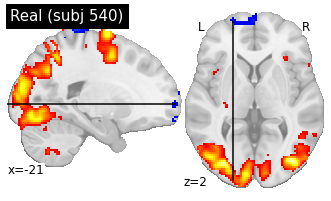

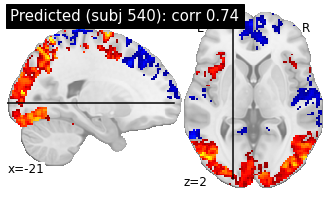

In [42]:
from nilearn import plotting

# Showing percentile threshold image
plotting.plot_stat_map(
    threshold_percentile_img,
    display_mode="xz",
    cut_coords=(-21,2),
    title="Real (subj 540)",
    colorbar=False,
)

# Showing intensity threshold image
plotting.plot_stat_map(
    threshold_value_img,
    display_mode="xz",
    cut_coords=(-21,2),
    title="Predicted (subj 540): corr 0.74",
    colorbar=False,
)

In [51]:
# find threshold with GMM

In [52]:
target.shape

(1000, 237969)

Log-likelihood of the data:  -2.3419565523385084


LinAlgError: Array must not contain infs or NaNs

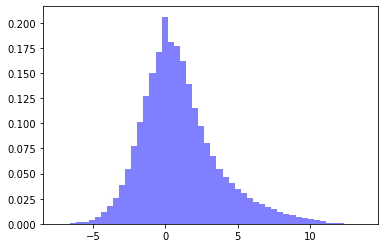

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from sklearn.mixture import GaussianMixture

# Generate some random z-scores to use as an example
# z_scores = np.concatenate([np.random.normal(loc=-2.5, scale=1.0, size=1000),
#                             np.random.normal(loc=2.5, scale=1.0, size=1000),
#                             np.random.gamma(2, scale=1, size=1000),
#                             -np.random.gamma(2, scale=1, size=1000)])

# Plot the histogram of the z-scores
plt.hist(target[540], bins=50, density=True, alpha=0.5, color='blue')

# Define the mixture model
gmm = GaussianMixture(n_components=3, covariance_type='spherical')

# Initialize the model parameters
gmm.means_ = np.array([0.0, -2.0, 2.0])
gmm.weights_ = np.array([0.5, 0.25, 0.25])
gmm.covariances_ = np.array([1.0, 1.0, 1.0])

# Fit the model to the z-scores
gmm.fit(target[540].reshape(-1, 1))

# Evaluate the model by calculating the log-likelihood of the data
print("Log-likelihood of the data: ", gmm.score(target[540].reshape(-1, 1)))

# Calculate the threshold by finding the intersection point of the Gaussian and gamma distributions
x = np.linspace(-6, 6, 1000)
gaussian_pdf = norm.pdf(x, gmm.means_[0], np.sqrt(gmm.covariances_[0]))
gamma_pdf_1 = gamma.pdf(x, 2, scale=1.0/gmm.means_[1])
gamma_pdf_2 = gamma.pdf(x, 2, scale=1.0/gmm.means_[2])
intersection_points = np.roots(gamma_pdf_1 - gamma_pdf_2 - gaussian_pdf)
threshold = intersection_points[np.isreal(intersection_points)][0].real

# Plot the mixture model and the threshold
plt.plot(x, gaussian_pdf * gmm.weights_[0], color='red', lw=2, label='Gaussian')
plt.plot(x, gamma_pdf_1 * gmm.weights_[1], color='green', lw=2, label='Gamma (+)')
plt.plot(x, gamma_pdf_2 * gmm.weights_[2], color='purple', lw=2, label='Gamma (-)')
plt.axvline(x=threshold, color='black', lw=2, label='Threshold')
plt.legend(loc='best')

plt.show()

In [47]:
gamma_pdf_1 - gamma_pdf_2 - gaussian_pdf

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na